In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [2]:
df = pd.read_csv('database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [4]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

# I will drop the columns that have more than 30% of missing values

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [7]:
df = df.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square'], axis=1)

In [8]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [9]:
df  = df.dropna(subset=['Magnitude Type'])

# removed the rows with missing values in the column Magnitude Type

df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [10]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


<Axes: >

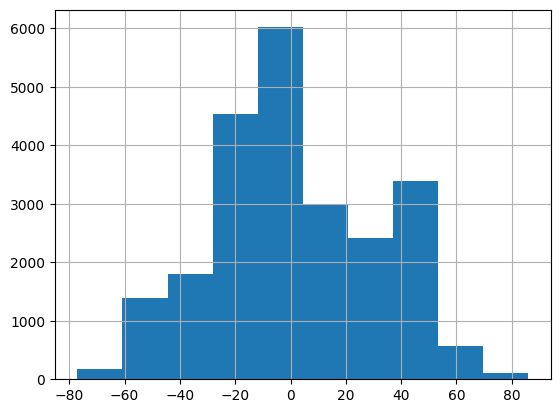

In [11]:
df['Latitude'].hist()

# Latitude is a normal distribution

In [12]:
values = df['Source'].unique()
values

value_counts = df['Source'].value_counts()
value_counts

df['Source'] = df['Source'].replace({'US': 1, 'ISCGEM': 0})

df['Source'] = pd.to_numeric(df['Source'], errors='coerce')

df = df.dropna(subset=['Source'])

In [13]:
values = df['Location Source'].unique()
values

value_counts = df['Location Source'].value_counts()
value_counts

df['Location Source'] = df['Location Source'].replace({'US': 1, 'ISCGEM': 0})

df['Location Source'] = pd.to_numeric(df['Location Source'], errors='coerce')

df = df.dropna(subset=['Location Source'])

In [14]:
values = df['Status'].unique()
values

value_counts = df['Status'].value_counts()
value_counts

df['Status'] = df['Status'].replace({'Automatic': 1, 'Reviewed': 0})

In [15]:
values_source = df['ID'].unique()
len(values_source)
df = df.drop(['ID'], axis=1)

# No need to keep the ID column

In [16]:
values = df['Magnitude Type'].unique()
df = df.drop(['Magnitude Type'], axis=1)
df = df.drop(['Magnitude Source'], axis=1)

In [17]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Source,Location Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,0.0,0.0,1
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,0.0,0.0,1
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,0.0,0.0,1
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,0.0,0.0,1
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,0.0,0.0,1


In [18]:
values = df['Type'].unique()
values

value_counts = df['Type'].value_counts()
value_counts

df['Type'] = df['Type'].replace({'Earthquake': 1, 'Nuclear Explosion': 0})

df['Type'] = pd.to_numeric(df['Type'], errors='coerce')

df = df.dropna(subset=['Type'])

In [19]:
df = df.drop(['Date', 'Time'], axis=1)

In [20]:
numeric_data = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
non_numeric_values = numeric_data.isna().any()
non_numeric_values

Latitude           False
Longitude          False
Type               False
Depth              False
Magnitude          False
Source             False
Location Source    False
Status             False
dtype: bool

In [21]:
df.corr().round(2)

,Latitude,Longitude,Type,Depth,Magnitude,Source,Location Source,Status
Latitude,1.00,0.24,-0.11,-0.08,0.04,-0.11,-0.11,0.11
Longitude,0.24,1.00,0.00,-0.09,0.04,-0.04,-0.04,0.04
Type,-0.11,0.00,1.00,0.05,0.00,-0.03,-0.03,0.03
Depth,-0.08,-0.09,0.05,1.00,0.02,0.01,0.01,-0.01
Magnitude,0.04,0.04,0.00,0.02,1.00,-0.10,-0.10,0.10
Source,-0.11,-0.04,-0.03,0.01,-0.10,1.00,1.00,-1.00
Location Source,-0.11,-0.04,-0.03,0.01,-0.10,1.00,1.00,-1.00
Status,0.11,0.04,0.03,-0.01,0.10,-1.00,-1.00,1.00


In [22]:
 # if you have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['Longitude', 'Depth', 'Magnitude', 'Source', 'Location Source', 'Status', 'Type']]

# have only the target variable here (dependent variable)
y = df['Latitude']

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# then split again the temporary variables by 50% (so if it was 30% originally => now it's
# 15%/15% (because 30% * 50% = 15%))

# so after this, we have 70% for training, 15% testing, and 15% validation
# => 100% in total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [24]:
# 9 variables in this case for training
training_variable_amount = len(X.columns)

# use ModelCheckpoint to always save the best version of the model
# from anywhere from the model's training history (not just the last epoch)
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# have all callbacks in a list
# this time we only have one
callback_list = [mc]

# create the structure of our neural network
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(training_variable_amount,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l1(l=0.1)),    
        layers.Dropout(0.2),
        layers.Dense(4, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(1)
    ]
)

# compile the neural network, use adam (most common one) as the optimizer
# and mean square error (mse) for the loss function (most common for regression problems)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='mse')

# show a quick recap of our structure
model.summary()

# start training , also attach callbacks
model.fit(x=X_train, y=y_train, epochs=1500, validation_data=(X_val, y_val), callbacks=callback_list)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 7)                 28        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 12)                96        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 52        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                       

KeyboardInterrupt: 

<Axes: >

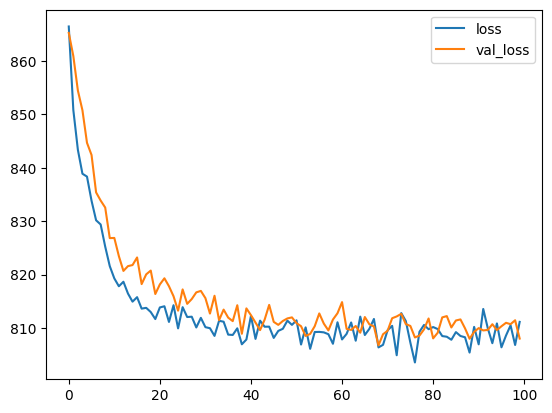

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
 # AFTER WE HAVE PLOTTED THE HISTORY
# => load the best version of the model from the filw
from keras.models import load_model
model = load_model('best_model.keras')

In [ ]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
786.64599609375

Train data evaluation:
793.337158203125


In [ ]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

107/107 [==============================] - 1s 5ms/step


,Test True Y,Model Predictions
0,-20.0000,-22.187155
1,-15.0284,-9.177412
2,-6.5670,7.538286
3,4.5810,7.538286
4,-60.7110,-13.405436
...,...,...
3415,-4.8700,7.538286
3416,45.5370,7.538286
3417,5.9670,-12.082630
3418,-17.9560,-21.575071


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

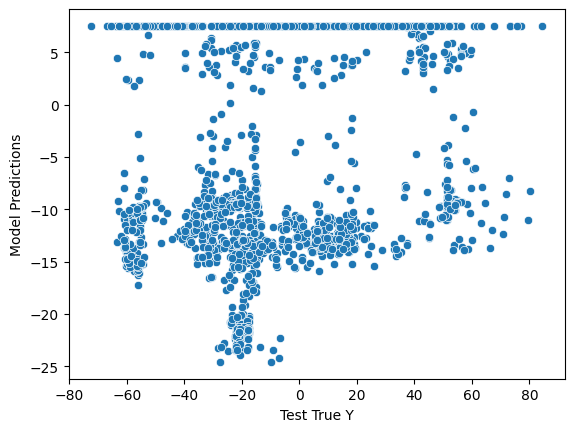

In [ ]:
 # compare the predictions to real values
# if these follow a diagonal line => they correlate well
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [ ]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
22.69 $

MSE
785.24 $^2

RMSE:
28.02 $

R-squared:
0.1

Explained variance score:
0.1


C:\Users\Roman\AppData\Local\Temp\ipykernel_24520\431118584.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


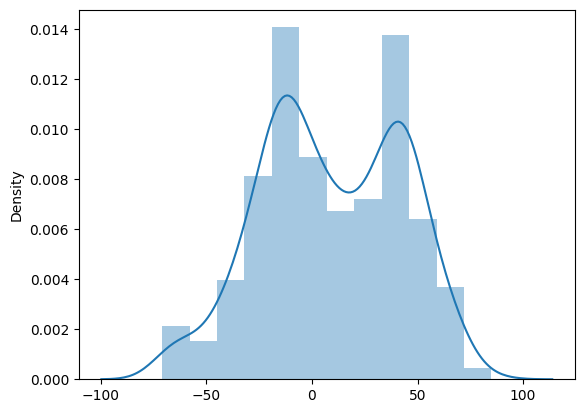

In [ ]:
 # residual histogram, does our model also follow 
# a normal distribution
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [ ]:
df.columns

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Source',
       'Location Source', 'Status'],
      dtype='object')

In [ ]:
tester_row = {
    'Longitude': 145,
    'Type': 1,
    'Depth': 131,
    'Magnitude': 6, 
    'Source': 0,
    'Location Source': 0, 
    'Status': 1
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [ ]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated Latitude:")
print(f"{round(float(result), 2)}")
print("----------------")

1/1 [==============================] - 0s 138ms/step

Estimated Latitude:
7.54
----------------


C:\Users\Roman\AppData\Local\Temp\ipykernel_24520\32192991.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{round(float(result), 2)}")
